In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
#read df
df = pd.read_csv('/content/drive/MyDrive/TASK_JPA/Task 1/df/marketing_campaign_data (1).csv')

In [24]:
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


In [25]:
#check types
df.dtypes

,0
Unnamed: 0,int64
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64


Feature engineering
3 kemungkinan conversion rate untung dilakukan feature engineering
1) Accepted Campaign (Jumlah campaign)
2) Purchases (Jumlah purchases)
3) Total spent (Jumlah barang dibeli)

In [26]:
# Accepted campaign
df['Accepted Campaign'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [27]:
# Purchases
df['Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [28]:
# total spent
df['Total Spent'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

Menghitung umur

In [30]:
#show collumn year birth
df['Year_Birth']


,Year_Birth
0,1957
1,1954
2,1965
3,1984
4,1981
...,...
2235,1967
2236,1946
2237,1981
2238,1956


In [31]:
print('the oldest is year', df['Year_Birth'].max())
print('the youngest is year', df['Year_Birth'].min())

the oldest is year 1996
the youngest is year 1893


In [32]:
# Calculating age at the time when store visit
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Age_when_visit'] = df['Dt_Customer'].dt.year - df['Year_Birth']

In [33]:
# Grouping age
df['Age'] = 2022-df['Year_Birth']

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Accepted Campaign,Purchases,Total Spent,Age_when_visit,Age
0,0,5524,1957,S1,Lajang,58138000.0,0,0,2012-09-04,58,...,0,0,3,11,1,0,25,1617000,55,65
1,1,2174,1954,S1,Lajang,46344000.0,1,1,2014-03-08,38,...,0,0,3,11,0,0,6,27000,60,68
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,...,0,0,3,11,0,0,21,776000,48,57
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,...,0,0,3,11,0,0,8,53000,30,38
4,4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,...,0,0,3,11,0,0,19,422000,33,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,2013-06-13,46,...,0,0,3,11,0,0,18,1341000,46,55
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,2014-06-10,56,...,0,0,3,11,0,1,22,444000,68,76
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,2014-01-25,91,...,0,0,3,11,0,1,19,1241000,33,41
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,2014-01-24,8,...,0,0,3,11,0,0,23,843000,58,66


In [36]:
#Making age group with intervals of 5 years
df.loc[(df['Age'] >= 0) & (df['Age'] < 12), 'age_group'] = "Anak_anak"
df.loc[(df['Age'] >= 12) & (df['Age'] < 18), 'age_group'] = "Remaja"
df.loc[(df['Age'] >= 18) & (df['Age'] < 36), 'age_group'] = "Dewasa_Muda"
df.loc[(df['Age'] >= 36) & (df['Age'] < 55), 'age_group'] = "Dewasa"
df.loc[(df['Age'] >= 55), 'age_group'] = "Lansia"

#save to dataset
df.to_csv('marketing_campaign_data_new.csv', index=False)

In [53]:
age_group_counts = df['age_group'].value_counts()

print("jumlah Anak_anak", age_group_counts.get('Anak_anak', 0))
print("jumlah Remaja", age_group_counts.get('Remaja', 0))
print("jumlah Dewasa_Muda", age_group_counts.get('Dewasa_Muda', 0))
print("jumlah Dewasa", age_group_counts.get('Dewasa', 0))
print("jumlah Lansia", age_group_counts.get('Lansia', 0))

jumlah Anak_anak 0
jumlah Remaja 0
jumlah Dewasa_Muda 147
jumlah Dewasa 1139
jumlah Lansia 954


Plotting hubungan umur dengan respon campaign

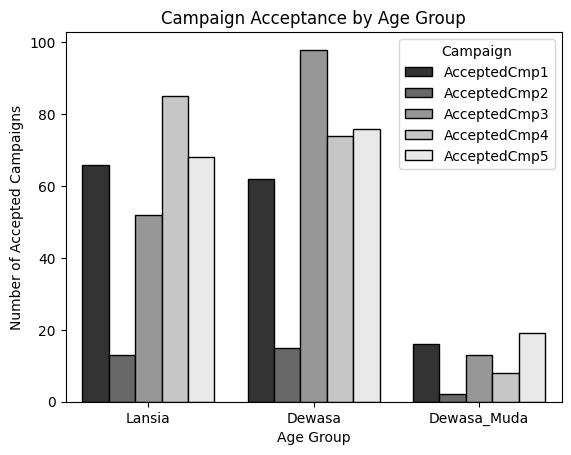

In [42]:
# Plotting relationship between age group and individual campaign responses
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df_melted = df.melt(id_vars=['age_group'], value_vars=campaign_cols, var_name='Campaign', value_name='Accepted')

# Filter out non-accepted responses to only show accepted counts
df_melted = df_melted[df_melted['Accepted'] == 1]

sns.countplot(x='age_group', hue='Campaign', data=df_melted, palette='Greys_r', edgecolor='black')
plt.title('Campaign Acceptance by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Accepted Campaigns')
plt.show()

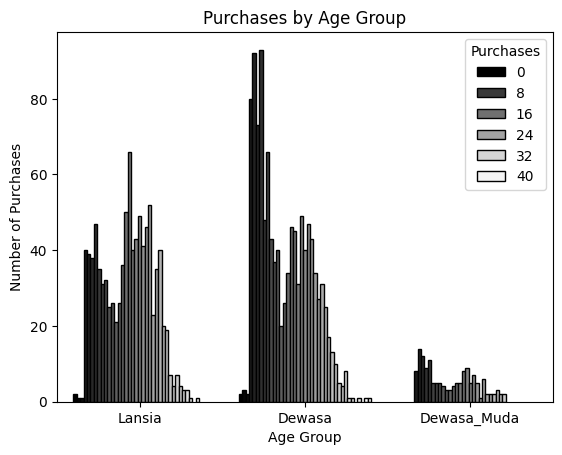

In [50]:
# Plotting relationship between age group and purchases
ax = sns.countplot(x='age_group', hue='Purchases', data=df, palette='Greys_r', edgecolor='black')
plt.title('Purchases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Purchases')

# Calculate the highest purchase count for each age group
max_purchases_per_age_group = df.groupby('age_group')['Purchases'].value_counts().unstack().max(axis=1)


plt.show()

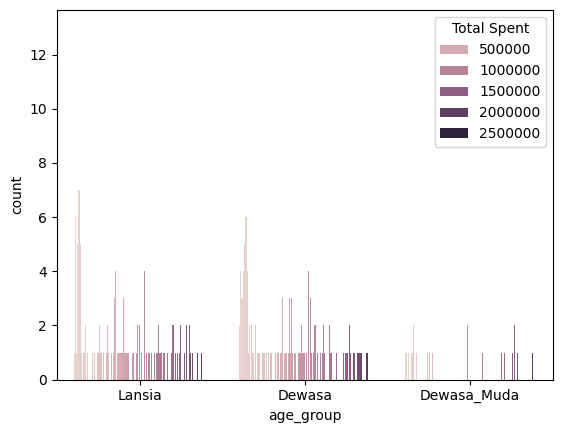

In [60]:
#plotting age group dengan total spent
ax = sns.countplot(x='age_group', hue='Total Spent', data=df)

In [58]:
# Find the Total Spent value with the highest frequency within each age group
highest_frequency_spent_per_age_group = df.groupby('age_group')['Total Spent'].value_counts().groupby(level=0).idxmax()

print("Highest frequency 'Total Spent' value and its age group:")
for age_group, spent_value in highest_frequency_spent_per_age_group.items():
    print(f"Age Group: {age_group}, Highest Frequency Spent: {spent_value}")

Highest frequency 'Total Spent' value and its age group:
Age Group: Dewasa, Highest Frequency Spent: ('Dewasa', 44000)
Age Group: Dewasa_Muda, Highest Frequency Spent: ('Dewasa_Muda', 34000)
Age Group: Lansia, Highest Frequency Spent: ('Lansia', 43000)


In [68]:
df['Income']

,Income
0,58138000.0
1,46344000.0
2,71613000.0
3,26646000.0
4,58293000.0
...,...
2235,61223000.0
2236,64014000.0
2237,56981000.0
2238,69245000.0


In [69]:
#count aggregate income groupped by age group
aggregate_income_by_age_group = df.groupby('age_group')['Income'].sum()
print("Aggregate Income by Age Group:")
# Format as currency (assuming Indonesian Rupiah based on previous context, but you can change the symbol if needed)
for age_group, income in aggregate_income_by_age_group.items():
    print(f"Age Group: {age_group}, Aggregate Income: Rp{income:,.0f}")

Aggregate Income by Age Group:
Age Group: Dewasa, Aggregate Income: Rp55,212,642,000
Age Group: Dewasa_Muda, Aggregate Income: Rp7,107,231,000
Age Group: Lansia, Aggregate Income: Rp53,460,036,000


In [70]:
#Count average income groupped by age group
average_income_by_age_group = df.groupby('age_group')['Income'].mean()
print("Average Income by Age Group:")
# Format as currency (assuming Indonesian Rupiah based on previous context, but you can change the symbol if needed)
for age_group, income in average_income_by_age_group.items():
    print(f"Age Group: {age_group}, Average Income: Rp{income:,.0f}")

Average Income by Age Group:
Age Group: Dewasa, Average Income: Rp48,990,809
Age Group: Dewasa_Muda, Average Income: Rp48,679,664
Age Group: Lansia, Average Income: Rp56,691,449


Temuan
1) Berdasarkan Graph campaign acceptance, Age group yang paling banyak menekan campaign adalah Dewasa, sedangkan Age group yang paling sedikit adalah Dewasa muda.

2) Mengikuti hasil graph poin 1, Paling banyak pada Purchases tetap pada Age group dewasa dan paling sedikit adalah dewasa muda.

3) Total spent juga masih menunjukan bahwa Dewasa masih menjadi primadona dan Dewasa muda tetap yang terendah.

Temuan diatas sejalan dengan temuan selanjutnya dimana
1) Agregat pendapatan Dewasa Muda merupakan yang paling kecil dengan besar Rp7,107,231,000 dengan rata-rata Rp48,679,664.

2) Agregat pendapatan Dewasa adalah yang paling besar dengan besar Rp55,212,642,000 dengan rata-rata Age Group: Dewasa, Average Income: Rp48,990,809.

3) Agregat pendapatan Lansia kedua tertinggi dengan besar Rp53,460,036,000, tetapi average income paling tinggi dengan besar Rp56,691,449

